# Data Processing

* DBNOs - Number of enemy players knocked.
* assists - Number of enemy players this player damaged that were killed by teammates.
* boosts - Number of boost items used.
* damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills - Number of enemy players killed with headshots.
* heals - Number of healing items used.
* Id - Player’s Id
* killPlace - Ranking in match of number of enemy players killed.
* killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* killStreaks - Max number of enemy players killed in a short amount of time.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* matchDuration - Duration of match in seconds.
* matchId - ID to identify match. There are no matches that are in both the training and testing set.
* matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* revives - Number of times this player revived teammates.
* rideDistance - Total distance traveled in vehicles measured in meters.
* roadKills - Number of kills while in a vehicle.
* swimDistance - Total distance traveled by swimming measured in meters.
* teamKills - Number of times this player killed a teammate.
* vehicleDestroys - Number of vehicles destroyed.
* walkDistance - Total distance traveled on foot measured in meters.
* weaponsAcquired - Number of weapons picked up.
* winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* numGroups - Number of groups we have data for in the match.
* maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [3]:
import pandas as pd

In [4]:
trainDataPath = "Data/train_V2.csv"
testDataPath = "Data/test_V2.csv"

In [51]:
trainData = pd.read_csv(trainDataPath)
trainData.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [9]:
trainData.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [52]:
# try trim dataset to only include those have killpoints
trainData_part=trainData.loc[trainData["killPoints"]>0,:]
trainData_part.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,...,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06
mean,2.485934e-01,1.078808e+00,1.333448e+02,6.679458e-01,2.284233e-01,1.322048e+00,4.774036e+01,1.253682e+03,9.295581e-01,5.478684e-01,...,1.650331e-01,5.476570e+02,3.024029e-03,4.374311e+00,1.548300e-02,6.549922e-03,1.141715e+03,3.633149e+00,1.505543e+03,4.722930e-01
std,6.056565e-01,1.683233e+00,1.723861e+02,1.160538e+00,6.088135e-01,2.601620e+00,2.754142e+01,1.972731e+02,1.570752e+00,7.173558e-01,...,4.729203e-01,1.429028e+03,6.929127e-02,2.961610e+01,1.407908e-01,8.396214e-02,1.174140e+03,2.462627e+00,6.865664e+01,3.072512e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.340000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.210000e+02,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,1.090000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.503000e+02,2.000000e+00,1.480000e+03,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.735000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,1.240000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.666000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.891000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.100000e+01,1.386000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.967000e+03,5.000000e+00,1.530000e+03,7.407000e-01
max,1.700000e+01,3.300000e+01,5.406000e+03,5.300000e+01,4.200000e+01,8.000000e+01,1.000000e+02,2.170000e+03,5.600000e+01,2.000000e+01,...,3.200000e+01,3.767000e+04,1.800000e+01,3.514000e+03,1.200000e+01,5.000000e+00,1.513000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [53]:
groupData_part=pd.DataFrame(trainData_part.groupby('groupId')[['assists', 'boosts', 'damageDealt', 'DBNOs','headshotKills', 'heals', 'killPlace', 'killPoints', 'kills','killStreaks', 'longestKill', 'matchDuration', 'maxPlace','numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills','swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired', 'winPoints', 'winPlacePerc']].mean())
groupData_part.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
groupId,,,,,,,,,,,,,,,,,,,,,
00003a54230763,0.500000,0.000000,50.000000,0.500000,0.5,0.0,54.5,1013.0,0.5,0.500000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,92.675000,2.5,1501.0,0.1395
000049feba5c83,0.333333,3.333333,111.053333,1.666667,0.0,8.0,25.0,1000.0,1.0,0.666667,...,0.666667,440.5,0.0,6.556667,0.0,0.0,2482.666667,4.0,1500.0,0.8387
00006aa800b4a7,0.000000,0.000000,0.000000,0.000000,0.0,0.0,69.0,998.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,174.800000,1.0,1494.0,0.3673
000077d5217a7c,0.000000,0.500000,0.000000,0.000000,0.0,0.0,47.5,1000.0,0.0,0.000000,...,0.000000,0.0,0.0,2.544000,0.0,0.0,1355.000000,3.5,1500.0,0.8298
0000909041d5c1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,1000.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,84.150000,1.0,1500.0,0.2812


In [54]:
combinedData_part=trainData_part.join(groupData_part,rsuffix="_team",on="groupId")
combinedData_part.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives_team,rideDistance_team,roadKills_team,swimDistance_team,teamKills_team,vehicleDestroys_team,walkDistance_team,weaponsAcquired_team,winPoints_team,winPlacePerc_team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0.000000,0.0,0.0,0.000000,0.0,0.0,182.990000,1.250000,1476.250000,0.4444
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0.000000,0.0,0.0,0.000000,0.0,0.0,23.411667,1.000000,1521.000000,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0.000000,2004.0,0.0,0.000000,0.0,0.0,1089.000000,6.000000,1500.000000,0.7368
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,...,0.000000,1228.0,0.0,76.840000,0.0,0.0,2050.000000,6.000000,1462.000000,0.8750
14,8e244ac61b6aab,d40d0c7d3573a1,94e1c1cc443c65,0,1,122.800,1,0,2,25,...,0.666667,997.4,0.0,51.303333,0.0,0.0,2049.000000,5.666667,1537.666667,0.9000


In [55]:
combinedData_part.drop(['Id', 'groupId', 'matchId','winPlacePerc_team'],inplace=True,axis=1)
combinedData_part.dropna(inplace=True)

In [57]:
combinedData_part.isnull().sum()

assists                 0
boosts                  0
damageDealt             0
DBNOs                   0
headshotKills           0
heals                   0
killPlace               0
killPoints              0
kills                   0
killStreaks             0
longestKill             0
matchDuration           0
matchType               0
maxPlace                0
numGroups               0
rankPoints              0
revives                 0
rideDistance            0
roadKills               0
swimDistance            0
teamKills               0
vehicleDestroys         0
walkDistance            0
weaponsAcquired         0
winPoints               0
winPlacePerc            0
assists_team            0
boosts_team             0
damageDealt_team        0
DBNOs_team              0
headshotKills_team      0
heals_team              0
killPlace_team          0
killPoints_team         0
kills_team              0
killStreaks_team        0
longestKill_team        0
matchDuration_team      0
maxPlace_tea

In [6]:
# data cleaning for full dataset
groupData=pd.DataFrame(trainData.groupby('groupId')[['assists', 'boosts', 'damageDealt', 'DBNOs','headshotKills', 'heals', 'killPlace', 'killPoints', 'kills','killStreaks', 'longestKill', 'matchDuration', 'maxPlace','numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills','swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired', 'winPoints', 'winPlacePerc']].mean())
groupData.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
groupId,,,,,,,,,,,,,,,,,,,,,
00000c08b5be36,0.000000,0.333333,247.166667,1.666667,0.333333,0.333333,50.333333,0.0,0.666667,0.666667,...,0.000000,0.0,0.0,0.000000,0.0,0.0,271.533333,2.333333,0.0,0.2000
00000d1cbbc340,0.000000,0.000000,173.700000,0.000000,0.000000,0.000000,40.000000,0.0,1.000000,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,135.800000,3.000000,0.0,0.1154
000025a09dd1d7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,110.800000,2.000000,0.0,0.2000
000038ec4dff53,0.666667,2.333333,263.556667,1.666667,0.333333,3.000000,13.000000,0.0,2.000000,1.000000,...,0.666667,0.0,0.0,74.923333,0.0,0.0,2082.666667,5.666667,0.0,0.9615
00003a54230763,0.500000,0.000000,50.000000,0.500000,0.500000,0.000000,54.500000,1013.0,0.500000,0.500000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,92.675000,2.500000,1501.0,0.1395


In [7]:
combinedData=trainData.join(groupData,rsuffix="_team",on="groupId")
combinedData.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives_team,rideDistance_team,roadKills_team,swimDistance_team,teamKills_team,vehicleDestroys_team,walkDistance_team,weaponsAcquired_team,winPoints_team,winPlacePerc_team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0,0.000000,0.0,0.00,0.0,0.0,182.99,1.25,1476.25,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0,3197.001125,0.0,2.76,0.0,0.0,1892.75,6.00,0.00,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0,170.200000,0.0,0.00,0.0,0.0,640.40,2.00,0.00,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0,0.000000,0.0,0.00,0.0,0.0,202.70,3.00,0.00,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0,0.000000,0.0,0.00,0.0,0.0,49.75,2.00,0.00,0.1875


In [8]:
combinedData.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'assists_team',
       'boosts_team', 'damageDealt_team', 'DBNOs_team', 'headshotKills_team',
       'heals_team', 'killPlace_team', 'killPoints_team', 'kills_team',
       'killStreaks_team', 'longestKill_team', 'matchDuration_team',
       'maxPlace_team', 'numGroups_team', 'rankPoints_team', 'revives_team',
       'rideDistance_team', 'roadKills_team', 'swimDistance_team',
       'teamKills_team', 'vehicleDestroys_team', 'walkDistance_team',
       'weaponsAcquired_team', 'winPoints_team', 'winPlacePerc_team'],
      dtype='object')

In [8]:
combinedData.drop(['Id', 'groupId', 'matchId','winPlacePerc_team'],inplace=True,axis=1)


In [9]:
combinedData.dropna(inplace=True)


In [10]:
combinedData.shape

(4446965, 50)

In [58]:
# to see the correlations between winPlaccePerc and all features
corr2=combinedData_part.corr()
co2 = pd.DataFrame(corr2.loc[:,"winPlacePerc"])
co2.sort_values("winPlacePerc")

,winPlacePerc
killPlace_team,-0.824379
killPlace,-0.719308
teamKills_team,-0.012566
teamKills,-0.008074
matchDuration_team,-0.003107
matchDuration,-0.003107
rankPoints,-0.001353
rankPoints_team,-0.001353
roadKills,0.029211
maxPlace_team,0.036164


In [33]:
co = pd.DataFrame(corr.loc[:,"winPlacePerc"])
co.sort_values("winPlacePerc")

,winPlacePerc
killPlace_team,-0.820770
killPlace,-0.719069
matchDuration_team,-0.005171
matchDuration,-0.005171
winPoints,0.007061
winPoints_team,0.007065
killPoints,0.012908
killPoints_team,0.012989
rankPoints,0.013523
rankPoints_team,0.013540


In [11]:
# visulaze correlations
corr=combinedData.corr()
corr.style.background_gradient()

In [23]:
# prepare data for speedml
i=int(4446965*0.75)
train = combinedData.iloc[0:i,:]
train.to_csv("speedtrain.csv")
test = combinedData.iloc[i:4446965,:]
test.to_csv("speedtest.csv")

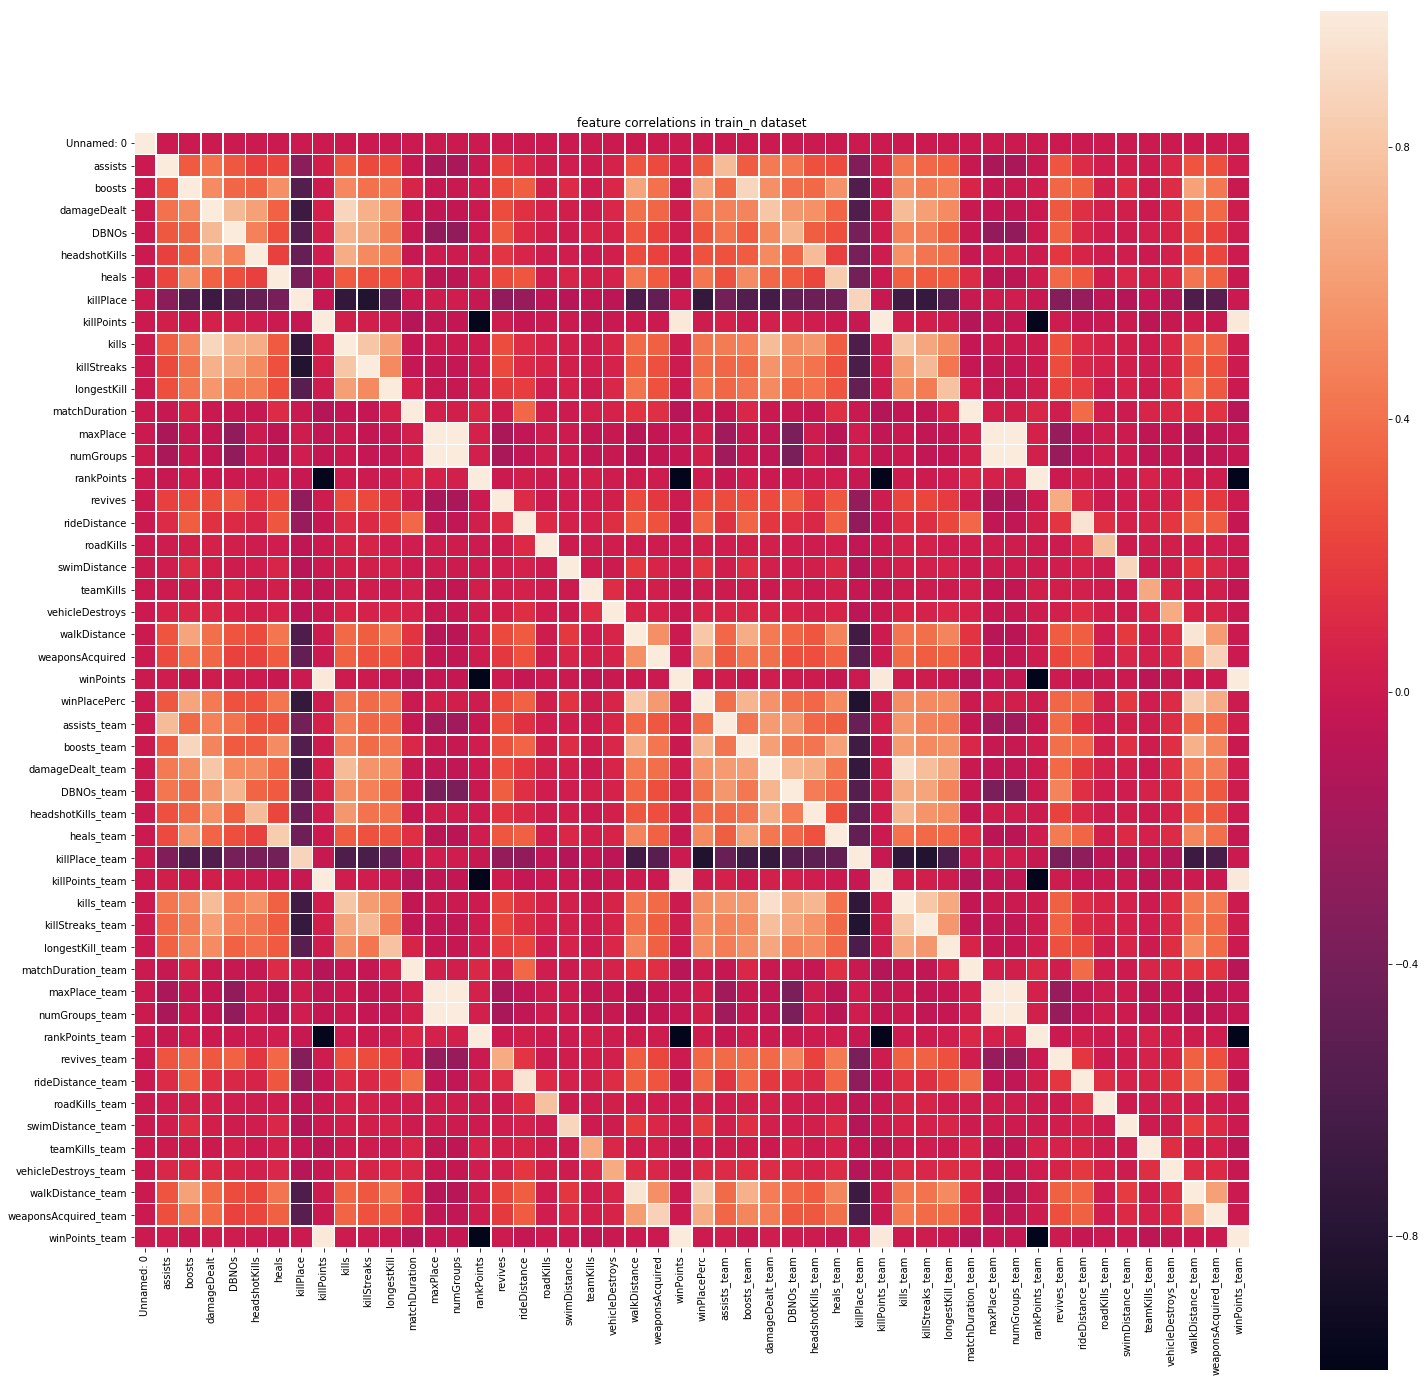

In [24]:
# use speedml to see correlations
from speedml import Speedml
sml = Speedml("speedtrain.csv","speedtest.csv",target="winPlacePerc")
sml.plot.correlate()

In [21]:
combinedData.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'assists_team', 'boosts_team', 'damageDealt_team',
       'DBNOs_team', 'headshotKills_team', 'heals_team', 'killPlace_team',
       'killPoints_team', 'kills_team', 'killStreaks_team', 'longestKill_team',
       'matchDuration_team', 'maxPlace_team', 'numGroups_team',
       'rankPoints_team', 'revives_team', 'rideDistance_team',
       'roadKills_team', 'swimDistance_team', 'teamKills_team',
       'vehicleDestroys_team', 'walkDistance_team', 'weaponsAcquired_team',
       'winPoints_team'],
      dtype='object')

In [105]:
# for full dataset:
# take out 'killPoints_team', 'rankPoints_team','winPoints_team'
# take out 'swimDistance','teamKills','matchDuration_team', 'maxPlace_team', 'numGroups_team'
trainingData=combinedData.loc[:,["matchType",'assists_team', 'boosts_team', 'damageDealt_team',
'DBNOs_team', 'headshotKills_team', 'heals_team', 'killPlace_team','kills_team', 'killStreaks_team', 'longestKill_team', 'revives_team', 'rideDistance_team',
'roadKills_team', 'vehicleDestroys_team', 'walkDistance_team', 'weaponsAcquired_team',"winPlacePerc"]]


In [59]:
# for partial dataset (only include datapoints with killpoints)
# take out 'swimDistance','teamKills','matchDuration_team', 'maxPlace_team', 'numGroups_team','rankPoints_team',
trainingData=combinedData_part.loc[:,["matchType",'assists_team', 'boosts_team', 'damageDealt_team',
'DBNOs_team', 'headshotKills_team', 'heals_team', 'killPlace_team','kills_team', 'killStreaks_team', 'longestKill_team', 'revives_team', 'rideDistance_team',
'roadKills_team', 'vehicleDestroys_team', 'walkDistance_team', 'weaponsAcquired_team','killPoints_team', 'winPoints_team',"winPlacePerc"]]


In [60]:
trainingData.describe()

,assists_team,boosts_team,damageDealt_team,DBNOs_team,headshotKills_team,heals_team,killPlace_team,kills_team,killStreaks_team,longestKill_team,revives_team,rideDistance_team,roadKills_team,vehicleDestroys_team,walkDistance_team,weaponsAcquired_team,killPoints_team,winPoints_team,winPlacePerc
count,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06,1.791319e+06
mean,2.485934e-01,1.078808e+00,1.333448e+02,6.679458e-01,2.284233e-01,1.322048e+00,4.774036e+01,9.295581e-01,5.478684e-01,2.248439e+01,1.650331e-01,5.476570e+02,3.024029e-03,6.549922e-03,1.141715e+03,3.633149e+00,1.253682e+03,1.505543e+03,4.722930e-01
std,4.526552e-01,1.486064e+00,1.376333e+02,8.247376e-01,4.562473e-01,2.165268e+00,2.403115e+01,1.249334e+00,5.272860e-01,3.924089e+01,3.149401e-01,1.367060e+03,5.462171e-02,5.557788e-02,1.133011e+03,2.129603e+00,1.637680e+02,5.598278e+01,3.072512e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.390000e+02,3.790000e+02,0.000000e+00
25%,0.000000e+00,0.000000e+00,4.592000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.866667e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.689540e+02,2.000000e+00,1.134000e+03,1.482000e+03,2.000000e-01
50%,0.000000e+00,5.000000e-01,9.702000e+01,5.000000e-01,0.000000e+00,5.000000e-01,4.680000e+01,5.000000e-01,5.000000e-01,6.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.141000e+02,3.500000e+00,1.249200e+03,1.500000e+03,4.583000e-01
75%,3.333333e-01,1.666667e+00,1.778750e+02,1.000000e+00,3.333333e-01,2.000000e+00,6.600000e+01,1.250000e+00,1.000000e+00,2.704000e+01,2.500000e-01,2.053417e+02,0.000000e+00,0.000000e+00,1.950000e+03,5.000000e+00,1.360000e+03,1.525500e+03,7.407000e-01
max,1.400000e+01,3.300000e+01,4.750000e+03,2.166667e+01,4.200000e+01,6.300000e+01,1.000000e+02,5.000000e+01,1.800000e+01,1.001000e+03,1.800000e+01,3.767000e+04,1.800000e+01,5.000000e+00,1.513000e+04,8.700000e+01,2.133000e+03,1.961000e+03,1.000000e+00


In [61]:
trainingData.shape

(1791319, 20)

In [37]:
trainingData.isnull().sum()

matchType               0
assists_team            0
boosts_team             0
damageDealt_team        0
DBNOs_team              0
headshotKills_team      0
heals_team              0
killPlace_team          0
kills_team              0
killStreaks_team        0
longestKill_team        0
revives_team            0
rideDistance_team       0
roadKills_team          0
vehicleDestroys_team    0
walkDistance_team       0
weaponsAcquired_team    0
winPlacePerc            0
dtype: int64

In [27]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 26 columns):
matchType               object
assists_team            float64
boosts_team             float64
damageDealt_team        float64
DBNOs_team              float64
headshotKills_team      float64
heals_team              float64
killPlace_team          float64
killPoints_team         float64
kills_team              float64
killStreaks_team        float64
longestKill_team        float64
matchDuration_team      float64
maxPlace_team           float64
numGroups_team          float64
rankPoints_team         float64
revives_team            float64
rideDistance_team       float64
roadKills_team          float64
swimDistance_team       float64
teamKills_team          float64
vehicleDestroys_team    float64
walkDistance_team       float64
weaponsAcquired_team    float64
winPoints_team          float64
winPlacePerc            float64
dtypes: float64(25), object(1)
memory usage: 916.0+ MB


In [106]:
# turn the matchType column into dummies  
trainingData=pd.get_dummies(trainingData)
trainingData.head()

,assists_team,boosts_team,damageDealt_team,DBNOs_team,headshotKills_team,heals_team,killPlace_team,kills_team,killStreaks_team,longestKill_team,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0.0,0.0,102.1875,0.5,0.25,0.00,47.25,1.0,0.25,6.91500,...,0,0,0,0,0,0,0,0,0,1
1,0.5,1.5,142.8175,0.5,0.00,3.25,37.00,1.0,0.75,20.91225,...,0,0,0,0,0,0,0,0,0,1
2,0.5,1.5,107.3000,0.5,0.00,1.00,32.50,1.0,0.50,5.42000,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,32.9000,0.0,0.00,0.00,75.00,0.0,0.00,0.00000,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,100.0000,0.0,0.00,0.00,45.00,1.0,1.00,58.53000,...,0,0,0,0,0,0,0,1,0,0


In [63]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1791319 entries, 0 to 4446961
Data columns (total 32 columns):
assists_team                  float64
boosts_team                   float64
damageDealt_team              float64
DBNOs_team                    float64
headshotKills_team            float64
heals_team                    float64
killPlace_team                float64
kills_team                    float64
killStreaks_team              float64
longestKill_team              float64
revives_team                  float64
rideDistance_team             float64
roadKills_team                float64
vehicleDestroys_team          float64
walkDistance_team             float64
weaponsAcquired_team          float64
killPoints_team               float64
winPoints_team                float64
winPlacePerc                  float64
matchType_duo                 uint8
matchType_duo-fpp             uint8
matchType_flaretpp            uint8
matchType_normal-duo          uint8
matchType_normal-duo-

In [114]:
# for the final random forest model - selected features only
trainingData = trainingData[['boosts_team','damageDealt_team','DBNOs_team','killPlace_team','kills_team','killStreaks_team','longestKill_team','walkDistance_team','weaponsAcquired_team',"winPlacePerc"]]

# Random Forest

In [122]:
# Use numpy to convert to arrays
#import numpy as np

# Labels are the values we want to predict
y = np.array(trainingData['winPlacePerc'])

# Remove the labels from the features
# axis 1 refers to the columns
X = trainingData.drop('winPlacePerc', axis = 1)

# Saving feature names for later use
X_list = list(X.columns)

# Convert to numpy array
X = np.array(X)

In [123]:
# Using Skicit-learn to split data into training and testing sets
#from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (3335223, 9)
Training y Shape: (3335223,)
Testing X Shape: (1111742, 9)
Testing y Shape: (1111742,)


In [117]:
# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 20, random_state=42,verbose=2)

In [124]:
# Train the model on training data
rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 30.5min finished


In [125]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4))

from sklearn.metrics import r2_score
r2_score(y_test, predictions)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


Mean Absolute Error: 0.0278


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   49.9s finished


0.9735232896553562

In [101]:
feature_importances = [x for x, importance in zip(X_list, importances) if importance>0.005]
feature_importances

['boosts_team',
 'damageDealt_team',
 'DBNOs_team',
 'killPlace_team',
 'kills_team',
 'killStreaks_team',
 'longestKill_team',
 'walkDistance_team',
 'weaponsAcquired_team',
 'matchType_crashfpp',
 'matchType_crashtpp']

In [120]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(x, round(importance, 4)) for x, importance in zip(X_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: walkDistance_team    Importance: 0.8094
Variable: killPlace_team       Importance: 0.0998
Variable: kills_team           Importance: 0.0165
Variable: damageDealt_team     Importance: 0.0154
Variable: weaponsAcquired_team Importance: 0.0131
Variable: boosts_team          Importance: 0.0128
Variable: longestKill_team     Importance: 0.0118
Variable: killStreaks_team     Importance: 0.0116
Variable: DBNOs_team           Importance: 0.0095


In [121]:
# save model 
from sklearn.externals import joblib
joblib.dump(rf, 'rf_team_simple.joblib')

['rf_team_simple.joblib']

In [78]:
# load model
rf_test = joblib.load('rf_team.joblib') 


In [79]:
# Use the forest's predict method on the test data
predictions = rf_test.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4))

r2_score(y_test, predictions)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.6s finished


Mean Absolute Error: 0.0274


0.9741742738975067

# Neural Network

In [82]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [83]:
from sklearn.preprocessing import StandardScaler

y_train2=np.reshape(y_train, (-1,1))
y_test2=np.reshape(y_test, (-1,1))

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train2)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train2)
y_test_scaled = y_scaler.transform(y_test2)

In [84]:
X_train.shape

(3335223, 32)

In [85]:
model = Sequential()
model.add(Dense(10, input_dim=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [90]:
NN=model.fit(X_train_scaled, y_train_scaled, epochs=20, verbose=2, validation_split=0.2)
#20 - 40

Train on 2668178 samples, validate on 667045 samples
Epoch 1/20
 - 74s - loss: 0.0731 - mean_squared_error: 0.0731 - mean_absolute_error: 0.2007 - val_loss: 0.0729 - val_mean_squared_error: 0.0729 - val_mean_absolute_error: 0.2014
Epoch 2/20
 - 74s - loss: 0.0731 - mean_squared_error: 0.0731 - mean_absolute_error: 0.2006 - val_loss: 0.0727 - val_mean_squared_error: 0.0727 - val_mean_absolute_error: 0.1999
Epoch 3/20
 - 76s - loss: 0.0730 - mean_squared_error: 0.0730 - mean_absolute_error: 0.2006 - val_loss: 0.0724 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.1992
Epoch 4/20
 - 74s - loss: 0.0729 - mean_squared_error: 0.0729 - mean_absolute_error: 0.2005 - val_loss: 0.0724 - val_mean_squared_error: 0.0724 - val_mean_absolute_error: 0.1996
Epoch 5/20
 - 75s - loss: 0.0729 - mean_squared_error: 0.0729 - mean_absolute_error: 0.2006 - val_loss: 0.0722 - val_mean_squared_error: 0.0722 - val_mean_absolute_error: 0.1995
Epoch 6/20
 - 74s - loss: 0.0729 - mean_squared_error: 0.

In [91]:
# Use the forest's predict method on the test data
predictions_n = model.predict(X_test_scaled)

# Calculate the absolute errors
errors = abs(predictions_n - y_test_scaled)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.2


In [92]:
y_test_prediction = y_scaler.inverse_transform(predictions_n)
errors = abs(y_test_prediction - y_test2)
print('Mean Absolute Error:', round(np.mean(errors), 4))

Mean Absolute Error: 0.0615


In [97]:
r2_score(y_test2, y_test_prediction)

0.9273379709130734

## Predict Test Data with Selected Random Forest Model

In [12]:
# load model
#from sklearn.externals import joblib
rf_test = joblib.load('rf_team_simple.joblib') 

In [5]:
test_df=pd.read_csv(testDataPath)

In [6]:
test_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [10]:
test_groupData=pd.DataFrame(test_df.groupby('groupId')[['assists', 'boosts', 'damageDealt', 'DBNOs','headshotKills', 'heals', 'killPlace', 'killPoints', 'kills','killStreaks', 'longestKill', 'matchDuration', 'maxPlace','numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills','swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired', 'winPoints']].mean())
test_groupData.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
groupId,,,,,,,,,,,,,,,,,,,,,
00000b5b45f70c,0.333333,6.333333,100.186667,1.00,0.0,6.666667,35.00,0.0,1.00,0.333333,...,1495.333333,0.666667,5755.333333,0.333333,0.0,0.0,0.0,1472.333333,5.00,0.0
00000fb8f2208b,0.500000,0.000000,47.300000,0.00,0.0,0.000000,70.50,0.0,0.00,0.000000,...,1419.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,290.850000,4.00,0.0
0000120038fb95,0.500000,1.500000,111.750000,0.00,0.0,1.500000,28.50,1262.0,1.00,0.500000,...,-1.000000,0.500000,672.000000,0.000000,0.0,0.0,0.0,2365.000000,7.50,1501.0
00001e221235dd,0.000000,1.000000,415.950000,2.00,1.0,4.000000,31.00,1347.5,2.00,1.000000,...,-1.000000,0.500000,0.000000,0.000000,0.0,0.0,0.0,448.150000,3.50,1488.0
000022937e1c55,0.000000,1.000000,80.750000,0.75,0.0,1.500000,62.75,0.0,0.25,0.250000,...,1486.000000,0.250000,0.000000,0.000000,0.0,0.0,0.0,264.050000,2.25,0.0


In [11]:
test_combinedData=test_groupData.join(test_groupData,rsuffix="_team",on="groupId")
test_combinedData.dropna(inplace=True)
test_combinedData.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints_team,revives_team,rideDistance_team,roadKills_team,swimDistance_team,teamKills_team,vehicleDestroys_team,walkDistance_team,weaponsAcquired_team,winPoints_team
groupId,,,,,,,,,,,,,,,,,,,,,
00000b5b45f70c,0.333333,6.333333,100.186667,1.00,0.0,6.666667,35.00,0.0,1.00,0.333333,...,1495.333333,0.666667,5755.333333,0.333333,0.0,0.0,0.0,1472.333333,5.00,0.0
00000fb8f2208b,0.500000,0.000000,47.300000,0.00,0.0,0.000000,70.50,0.0,0.00,0.000000,...,1419.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,290.850000,4.00,0.0
0000120038fb95,0.500000,1.500000,111.750000,0.00,0.0,1.500000,28.50,1262.0,1.00,0.500000,...,-1.000000,0.500000,672.000000,0.000000,0.0,0.0,0.0,2365.000000,7.50,1501.0
00001e221235dd,0.000000,1.000000,415.950000,2.00,1.0,4.000000,31.00,1347.5,2.00,1.000000,...,-1.000000,0.500000,0.000000,0.000000,0.0,0.0,0.0,448.150000,3.50,1488.0
000022937e1c55,0.000000,1.000000,80.750000,0.75,0.0,1.500000,62.75,0.0,0.25,0.250000,...,1486.000000,0.250000,0.000000,0.000000,0.0,0.0,0.0,264.050000,2.25,0.0


In [14]:
test_Data = test_combinedData[['boosts_team','damageDealt_team','DBNOs_team','killPlace_team','kills_team','killStreaks_team','longestKill_team','walkDistance_team','weaponsAcquired_team']]
test_Data.head()

,boosts_team,damageDealt_team,DBNOs_team,killPlace_team,kills_team,killStreaks_team,longestKill_team,walkDistance_team,weaponsAcquired_team
groupId,,,,,,,,,
00000b5b45f70c,6.333333,100.186667,1.00,35.00,1.00,0.333333,22.116667,1472.333333,5.00
00000fb8f2208b,0.000000,47.300000,0.00,70.50,0.00,0.000000,0.000000,290.850000,4.00
0000120038fb95,1.500000,111.750000,0.00,28.50,1.00,0.500000,31.070000,2365.000000,7.50
00001e221235dd,1.000000,415.950000,2.00,31.00,2.00,1.000000,17.780000,448.150000,3.50
000022937e1c55,1.000000,80.750000,0.75,62.75,0.25,0.250000,4.830000,264.050000,2.25


In [16]:
predictions = rf_test.predict(test_Data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


In [17]:
predictions

array([0.764665, 0.30665 , 0.827735, ..., 0.339295, 0.324745, 0.10443 ])

In [18]:
test_Data["results"]=predictions
test_Data.head()

C:\Users\Wusi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,boosts_team,damageDealt_team,DBNOs_team,killPlace_team,kills_team,killStreaks_team,longestKill_team,walkDistance_team,weaponsAcquired_team,results
groupId,,,,,,,,,,
00000b5b45f70c,6.333333,100.186667,1.00,35.00,1.00,0.333333,22.116667,1472.333333,5.00,0.764665
00000fb8f2208b,0.000000,47.300000,0.00,70.50,0.00,0.000000,0.000000,290.850000,4.00,0.306650
0000120038fb95,1.500000,111.750000,0.00,28.50,1.00,0.500000,31.070000,2365.000000,7.50,0.827735
00001e221235dd,1.000000,415.950000,2.00,31.00,2.00,1.000000,17.780000,448.150000,3.50,0.467100
000022937e1c55,1.000000,80.750000,0.75,62.75,0.25,0.250000,4.830000,264.050000,2.25,0.265010


In [20]:
group_result=test_Data[["results"]]
id_n_group=test_df[["Id","groupId"]]

In [24]:
final_result=id_n_group.join(group_result,on="groupId")
final_result.head()

,Id,groupId,results
0,9329eb41e215eb,676b23c24e70d6,0.260360
1,639bd0dcd7bda8,430933124148dd,0.914323
2,63d5c8ef8dfe91,0b45f5db20ba99,0.777615
3,cf5b81422591d1,b7497dbdc77f4a,0.628785
4,ee6a295187ba21,6604ce20a1d230,0.904940


In [26]:
final_result.drop(["groupId"],inplace=True,axis=1)
final_result.head()

,Id,results
0,9329eb41e215eb,0.260360
1,639bd0dcd7bda8,0.914323
2,63d5c8ef8dfe91,0.777615
3,cf5b81422591d1,0.628785
4,ee6a295187ba21,0.904940


In [27]:
final_result.to_csv("prediction_result.csv")